In [1]:
from lxml import etree
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import jieba
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
import zipfile
r = requests.get('https://github.com/cystanford/text_classification/archive/master.zip',stream = True)
print(r.status_code)
f = io.BytesIO(r.content)

def read_txt(filename, encoding='utf-8'):
    with zipfile.ZipFile(f) as myzip:
        with myzip.open(filename, 'r') as myfile:
            lines = myfile.readlines()

    # print(filename)
    stop_words = [line.strip().decode(encoding, 'ignore')
                  for line in lines]  #'ignore'
    return stop_words


stopwords = list(STOPWORDS)
stopwords = stopwords + read_txt(
    'text_classification-master/text classification/stop/stopword.txt',
    encoding='utf-8-sig')

f.close()

200


In [3]:
text = []
for i in np.arange(0, 400, 20):
    print("Page: ", int(i/20) + 1)
    r = requests.get(
        'https://movie.douban.com/subject/3878007/comments?start=' + str(i) +
        '&limit=20&sort=new_score&status=P&percent_type=')
    f = io.StringIO(r.text)
    html = etree.HTML(f.getvalue())
    f.close()
    html_data = html.xpath(
        "/html/body/div[@id='wrapper']/div[@id='content']/div[@class='grid-16-8 clearfix']/div[@class='article']/div[@id='comments']/div[@class='comment-item']/div[@class='comment']/p/span[@class='short']"
    )
    text.extend([i.text.replace('\n', '').strip() for i in html_data])

Page:  1
Page:  2
Page:  3
Page:  4
Page:  5
Page:  6
Page:  7
Page:  8
Page:  9
Page:  10
Page:  11
Page:  12
Page:  13
Page:  14
Page:  15
Page:  16
Page:  17
Page:  18
Page:  19
Page:  20


In [4]:
print(len(text))
text[:5]

220


['4.5。1.从造梦层面而言，温子仁真的远超我的预期；如果你觉得这也算失手，那我无话可说，只能闭嘴。2.这场梦始于失落的亚特兰蒂斯，继而又按图索骥，如探索迷宫般牵引出整座深海帝国的神秘版图，看似不过闯关游戏式的老套路，其实还是以西方古典神话为模本的，类似亚瑟王寻找圣杯。3.固然温子仁并没有全然秉承DC的暗黑风格，但那场海王亚瑟与守护三叉戟的海怪之间的对话，着实是以DC的方式丰满了角色。4.要说不足，西西里跑酷略显脱节，而海底决战时刻有点场面失控。',
 '温子仁就是“狂”，并且简直就是个“技术狂人”啊。斯皮尔伯格、卢卡斯、卡梅隆之后，就是温子仁了。世界顶级技术型导演，从此以后，有了一名华裔，温子仁！！！他怎么可以把一部超英片，拍得如此上天入海、天花乱坠、无所不用其极啊。',
 '海底世界戏份多到超出想象，这是一部主打海洋英雄的片应有的样子，一本满足。撒哈拉沙漠、西西里岛、海沟族追逐戏、地心藏海…奔波全球海洋奇观，上天入地，美不胜收。温子仁手下的DC，不再暗黑，情节跌宕又完整，正如他的恐怖片一样吸人，吸入深海底。亚特兰蒂斯与亚瑟的历史传说，完美融入超级英雄剧情，陆地之子抑或海洋之王，海王不止粗汉也有柔情，三叉戟秒变金箍棒，这不就是《西游记之大闹龙宫》？红发女主的造型很美，特别是水母服。“海洋的世界里没有眼泪” 几十年的灯塔守护直接戳泪，爱一个人不就是这样的无私与痴情？2018最佳娱乐大赏，《狮子王》版《海底总动员》，《黑暗骑士》后最好的DC院线片。',
 '咸水族的那个帝王蟹，好像很好吃的样子！',
 '没有一些人吹的那么高，但足够精彩。温子仁没疯，他只是太会讲故事，太会知道如何调动观众的肾上腺素，无论是以前拍恐怖片、动作片，还是这次拍超级英雄片，什么时候该打斗，什么时候该落寞，什么时候该摆pose，什么时候该接吻，什么时候该逗比，他在这些已经程式化的东西中加入了自己的天马行空，于是我们跟随着海王和湄拉的脚步上天入地下海，从一个夺位权谋片生生变成了热血冒险片。不得不说这部的特效确实是目前能想到的最顶级的展现，各种奇观应有尽有。而海王的成长，也是战胜自卑接受使命的过程，甚至有几分东方武侠的风韵。只可惜故事本身太过套路，确实乏善可陈，只能以特效和热血来弥补了。']

In [5]:
def get_words(data):
    #data_chain = list(chain(*data))
    # 分词
    data_chain = [' '.join(jieba.cut(x)) for x in data]
    return data_chain


words = get_words(text)
words[:5]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/8b/mn7p_n410l5dh_8lxtjy_m680000gn/T/jieba.cache
Loading model cost 0.878 seconds.
Prefix dict has been built succesfully.


['4.5 。 1 . 从造 梦 层面 而言 ， 温子仁 真的 远超 我 的 预期 ； 如果 你 觉得 这 也 算 失手 ， 那 我 无话可说 ， 只能 闭嘴 。 2 . 这场 梦 始于 失落 的 亚特兰蒂斯 ， 继而 又 按图索骥 ， 如 探索 迷宫般 牵引 出 整座 深海 帝国 的 神秘 版图 ， 看似 不过 闯关 游戏 式 的 老套路 ， 其实 还是 以 西方 古典 神话 为 模本 的 ， 类似 亚瑟王 寻找 圣杯 。 3 . 固然 温子仁 并 没有 全然 秉承 DC 的 暗黑 风格 ， 但 那场 海王 亚瑟 与 守护 三叉戟 的 海怪 之间 的 对话 ， 着实 是 以 DC 的 方式 丰满 了 角色 。 4 . 要说 不足 ， 西西里 跑酷 略显 脱节 ， 而 海底 决战 时刻 有点 场面 失控 。',
 '温子仁 就是 “ 狂 ” ， 并且 简直 就是 个 “ 技术 狂人 ” 啊 。 斯皮尔伯格 、 卢卡斯 、 卡梅隆 之后 ， 就是 温子仁 了 。 世界 顶级 技术型 导演 ， 从此以后 ， 有 了 一名 华裔 ， 温子仁 ！ ！ ！ 他 怎么 可以 把 一部 超英 片 ， 拍 得 如此 上天 入海 、 天花乱坠 、 无所不用其极 啊 。',
 '海底 世界 戏份 多到 超出 想象 ， 这是 一部 主打 海洋 英雄 的 片 应有 的 样子 ， 一本 满足 。 撒哈拉沙漠 、 西西里岛 、 海沟 族 追逐 戏 、 地心 藏海 … 奔波 全球 海洋 奇观 ， 上天入地 ， 美不胜收 。 温子仁 手下 的 DC ， 不再 暗黑 ， 情节 跌宕 又 完整 ， 正如 他 的 恐怖片 一样 吸人 ， 吸入 深 海底 。 亚特兰蒂斯 与 亚瑟 的 历史 传说 ， 完美 融入 超级 英雄 剧情 ， 陆地 之子 抑或 海洋 之王 ， 海王 不止 粗汉 也 有 柔情 ， 三叉戟 秒 变 金箍棒 ， 这 不 就是 《 西游记 之大闹 龙宫 》 ？ 红发 女主 的 造型 很 美 ， 特别 是 水母 服 。 “ 海洋 的 世界 里 没有 眼泪 ”   几十年 的 灯塔 守护 直接 戳 泪 ， 爱 一个 人 不 就是 这样 的 无私 与 痴情 ？ 2018 最佳 娱乐 大赏 ， 《 狮子王 》 版 《 海底 总动员 》 ， 《 黑暗 骑士 》 后 最好 的 DC 院线 片 。',


(-0.5, 399.5, 199.5, -0.5)

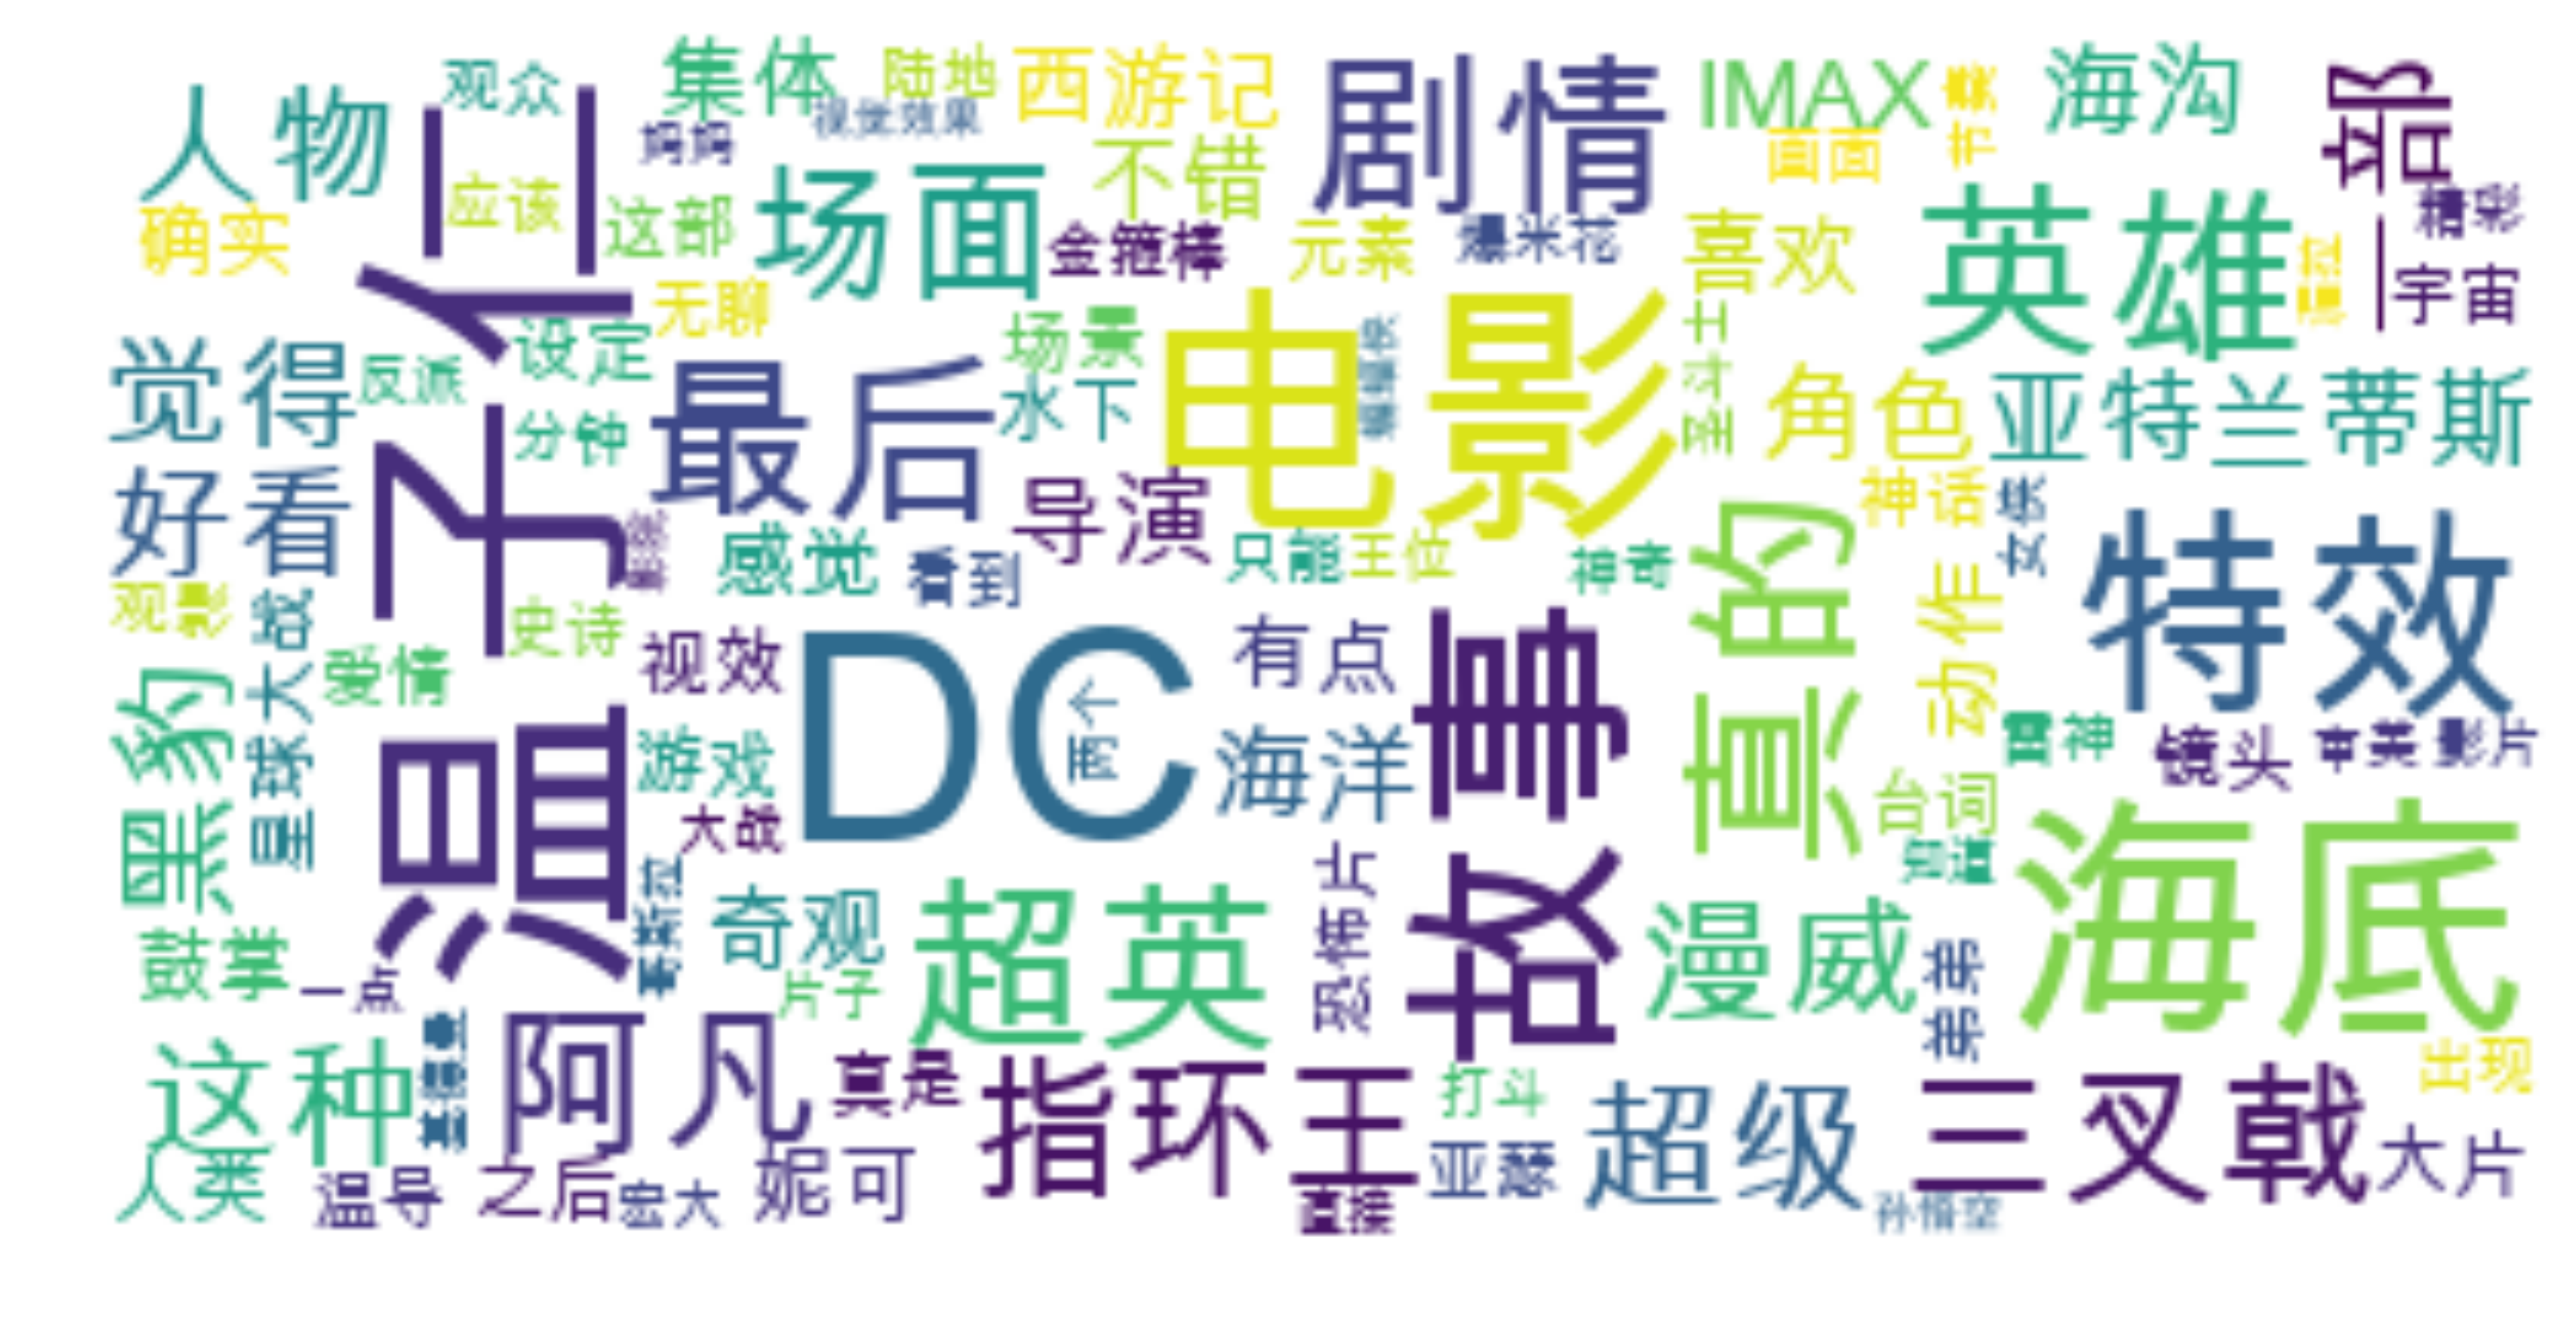

In [6]:
joined_words = ' '.join(words).replace(u'海王',' ')

wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',max_font_size=50, max_words=100,
                      background_color="white",stopwords=stopwords,collocations=False).generate(joined_words)
plt.figure(figsize=[15,15],dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")